In [140]:
import os
from pathlib import Path
import numpy as np
import tensorflow as tf
from pprint import pformat
from PIL import Image, ImageDraw

In [ ]:
# env to run this notebook:  /home/teo/venvs/py37-tf-fld
# This uses model downloaded from
!wget https://github.com/google/mediapipe/blob/master/mediapipe/models/face_landmark.tflite

In [25]:
PICS_DIR = Path( '/home/teo/Dokumente/Personales/Photos' )

In [6]:
# The following code mostly taken from:
# https://www.tensorflow.org/lite/guide/inference

model_path = os.getenv('HOME') + '/models/face_landmark_detection/face_landmark.tflite'
interpreter = tf.lite.Interpreter(model_path=model_path)
interpreter.allocate_tensors()

In [12]:
input_details = interpreter.get_input_details()
print("input:\n", pformat(input_details) )

output_details = interpreter.get_output_details()
print("\noutput:\n", pformat(output_details) ) 


input:
 [{'dtype': <class 'numpy.float32'>,
  'index': 0,
  'name': 'input_1',
  'quantization': (0.0, 0),
  'quantization_parameters': {'quantized_dimension': 0,
                              'scales': array([], dtype=float32),
                              'zero_points': array([], dtype=int32)},
  'shape': array([  1, 192, 192,   3], dtype=int32),
  'shape_signature': array([  1, 192, 192,   3], dtype=int32),
  'sparsity_parameters': {}}]

output:
 [{'dtype': <class 'numpy.float32'>,
  'index': 213,
  'name': 'conv2d_20',
  'quantization': (0.0, 0),
  'quantization_parameters': {'quantized_dimension': 0,
                              'scales': array([], dtype=float32),
                              'zero_points': array([], dtype=int32)},
  'shape': array([   1,    1,    1, 1404], dtype=int32),
  'shape_signature': array([   1,    1,    1, 1404], dtype=int32),
  'sparsity_parameters': {}},
 {'dtype': <class 'numpy.float32'>,
  'index': 210,
  'name': 'conv2d_30',
  'quantization': (0.

In [13]:
input_shape = input_details[0]['shape']

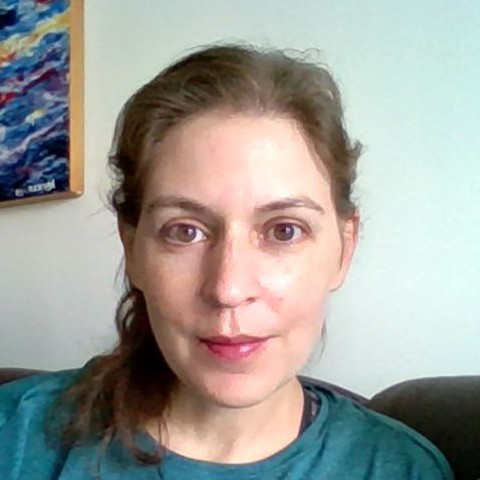

In [148]:
img = Image.open( PICS_DIR / '2021-01-10-0934-monis-1.jpg')
img

In [149]:
img.size

(480, 480)

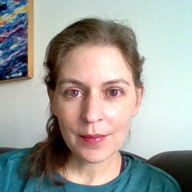

In [150]:
img1 = img.resize( (192, 192) )
img1c = img1.copy()
img1
img1c

In [151]:
# np.asarray(img1)

In [153]:
img1a = np.asarray(img1).reshape( [1,192,192, 3])
print( img1a.shape, img1a.dtype ) 
img1t = tf.convert_to_tensor( img1a, dtype=np.float32 ) / 255.0


(1, 192, 192, 3) uint8


In [107]:
import timeit

In [154]:
def get_xyz_vectors( output_data: np.ndarray ):
    return output_data.reshape( (468, 3))

interpreter.set_tensor(input_details[0]['index'], img1t )

interpreter.invoke()

# The function `get_tensor()` returns a copy of the tensor data.
# Use `tensor()` in order to get a pointer to the tensor.
face_prob = interpreter.get_tensor(output_details[1]['index'])[0, 0, 0, 0]
output_data = interpreter.get_tensor(output_details[0]['index'])[0, 0, 0 ]
print(face_prob, output_data)
lmarks = get_xyz_vectors( output_data )

31.20124 [ 94.21353   132.29227    -7.543039  ... 125.98942    88.48869
   1.4817569]


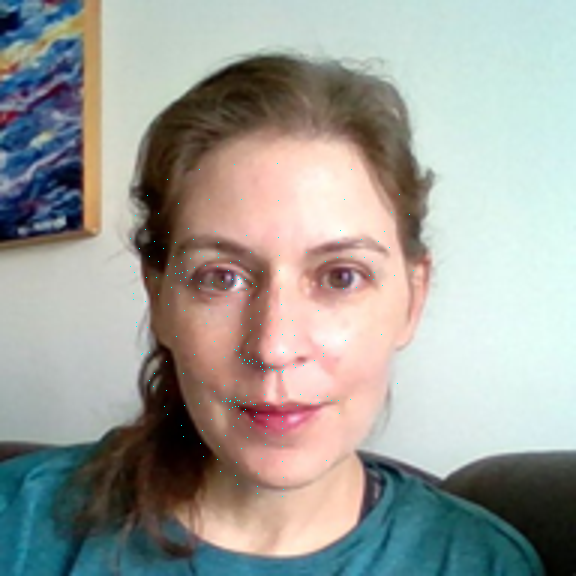

In [161]:
zoom = 3.0 
img1c = img1.copy().resize( (int(img1.size[0] * zoom), int(img1.size[1] * zoom))  ) 

draw = ImageDraw.Draw( img1c )

n_all = lmarks.shape[0]

n_draw = 50
for i in range( 300 ):
    draw.point( lmarks[i,:2] * zoom, fill=(0, 255, 255) )
    
img1c